<a href="https://colab.research.google.com/github/PeterBoshra993/Ohio-Crime-Camera-Exploration/blob/main/ohio_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# # columns = ["feature","coordinates", "type","properties", "ACRES","ADDRESS"]
# df = pd.read_csv("/content/drive/MyDrive/Ohio crime prediction/central-ohio-points-of-interest-1.csv")
# df.head()

In [4]:
# df.iloc[5000][0]

In [5]:
# import json

In [6]:
# from pandas.io.json import json_normalize

In [7]:
# import ast

In [8]:
# def only_dict(d):
#     '''
#     Convert json string representation of dictionary to a python dict
#     '''
#     return ast.literal_eval(d)

# def list_of_dicts(ld):
#     '''
#     Create a mapping of the tuples formed after 
#     converting json strings of list to a python list   
#     '''
#     return dict([(list(d.values())[1], list(d.values())[0]) for d in ast.literal_eval(ld)])

In [9]:
# df = df.join(json_normalize(df["feature"].tolist()).add_prefix("feature."))

In [10]:
# s = df['feature'].map(json.loads).apply(pd.Series).add_prefix('feature.')
# s

In [11]:
# s['feature.geometry'][0]

In [12]:
## New try But we will comment the sections before this one

import pandas as pd
import json

## Must be read line by line
with open('/content/drive/MyDrive/Ohio crime prediction/central-ohio-points-of-interest-1.csv', 'r', encoding='utf-8') as file:
    lines = file.readlines()

lines

['feature\n',
 '"{""geometry"":{""coordinates"":[-83.23315828584491,40.15871517867234],""type"":""Point""},""properties"":{""ACRES"":null,""ADDRESS"":""10220 US 42"",""BUSES"":null,""CATEGORY"":""Commercial"",""COMMUNITY"":""MARYSVILLE"",""COUNTY"":""Union"",""Created"":""2017-03-08T18:11:20.000Z"",""DESCRIPTION"":null,""FACID"":null,""GRADESPAN"":null,""GlobalID"":""{163B5D2A-D6A9-42C4-84F2-2B9EE92C3745}"",""LAST_EDIT_DATE"":""2019-11-26T14:08:42.000Z"",""NAME"":""AMERICAN INN"",""OBJECTID"":14904,""RESIDENTS"":28,""Region"":1,""SCH_DIST"":null,""SOURCE"":""ODOT EMPLOYER DATA; GOOGLE; OHIO HOTEL & LODGING ASSOCIATION"",""SQFT"":null,""STATUS"":null,""STUDENTS"":null,""TAZ"":""85021"",""TEACHERS"":null,""TYPE"":""Hotel"",""UNIQID"":3610,""YEAR_BUILT"":null,""ZIPCODE"":null},""type"":""Feature""}"\n',
 '"{""geometry"":{""coordinates"":[-83.1155844720119,40.00118798546749],""type"":""Point""},""properties"":{""ACRES"":null,""ADDRESS"":""2305 WILSON RD"",""BUSES"":null,""CATEGORY"":""Comm

In [13]:
## next we will remove double quotation marks before and after each line
lines = [x[1:-2].replace('""', '"') for x in lines[1:]]
lines

['{"geometry":{"coordinates":[-83.23315828584491,40.15871517867234],"type":"Point"},"properties":{"ACRES":null,"ADDRESS":"10220 US 42","BUSES":null,"CATEGORY":"Commercial","COMMUNITY":"MARYSVILLE","COUNTY":"Union","Created":"2017-03-08T18:11:20.000Z","DESCRIPTION":null,"FACID":null,"GRADESPAN":null,"GlobalID":"{163B5D2A-D6A9-42C4-84F2-2B9EE92C3745}","LAST_EDIT_DATE":"2019-11-26T14:08:42.000Z","NAME":"AMERICAN INN","OBJECTID":14904,"RESIDENTS":28,"Region":1,"SCH_DIST":null,"SOURCE":"ODOT EMPLOYER DATA; GOOGLE; OHIO HOTEL & LODGING ASSOCIATION","SQFT":null,"STATUS":null,"STUDENTS":null,"TAZ":"85021","TEACHERS":null,"TYPE":"Hotel","UNIQID":3610,"YEAR_BUILT":null,"ZIPCODE":null},"type":"Feature"}',
 '{"geometry":{"coordinates":[-83.1155844720119,40.00118798546749],"type":"Point"},"properties":{"ACRES":null,"ADDRESS":"2305 WILSON RD","BUSES":null,"CATEGORY":"Commercial","COMMUNITY":"COLUMBUS","COUNTY":"Franklin","Created":"2017-03-08T18:11:20.000Z","DESCRIPTION":null,"FACID":null,"GRADESPAN

In [14]:
## convert Json string to dictionary by using loads ---> load string
dicts = [json.loads(x) for x in lines]
dicts

[{'geometry': {'coordinates': [-83.23315828584491, 40.15871517867234],
   'type': 'Point'},
  'properties': {'ACRES': None,
   'ADDRESS': '10220 US 42',
   'BUSES': None,
   'CATEGORY': 'Commercial',
   'COMMUNITY': 'MARYSVILLE',
   'COUNTY': 'Union',
   'Created': '2017-03-08T18:11:20.000Z',
   'DESCRIPTION': None,
   'FACID': None,
   'GRADESPAN': None,
   'GlobalID': '{163B5D2A-D6A9-42C4-84F2-2B9EE92C3745}',
   'LAST_EDIT_DATE': '2019-11-26T14:08:42.000Z',
   'NAME': 'AMERICAN INN',
   'OBJECTID': 14904,
   'RESIDENTS': 28,
   'Region': 1,
   'SCH_DIST': None,
   'SOURCE': 'ODOT EMPLOYER DATA; GOOGLE; OHIO HOTEL & LODGING ASSOCIATION',
   'SQFT': None,
   'STATUS': None,
   'STUDENTS': None,
   'TAZ': '85021',
   'TEACHERS': None,
   'TYPE': 'Hotel',
   'UNIQID': 3610,
   'YEAR_BUILT': None,
   'ZIPCODE': None},
  'type': 'Feature'},
 {'geometry': {'coordinates': [-83.1155844720119, 40.00118798546749],
   'type': 'Point'},
  'properties': {'ACRES': None,
   'ADDRESS': '2305 WILSON R

In [15]:
## check one of them
x = dicts[0]
x

{'geometry': {'coordinates': [-83.23315828584491, 40.15871517867234],
  'type': 'Point'},
 'properties': {'ACRES': None,
  'ADDRESS': '10220 US 42',
  'BUSES': None,
  'CATEGORY': 'Commercial',
  'COMMUNITY': 'MARYSVILLE',
  'COUNTY': 'Union',
  'Created': '2017-03-08T18:11:20.000Z',
  'DESCRIPTION': None,
  'FACID': None,
  'GRADESPAN': None,
  'GlobalID': '{163B5D2A-D6A9-42C4-84F2-2B9EE92C3745}',
  'LAST_EDIT_DATE': '2019-11-26T14:08:42.000Z',
  'NAME': 'AMERICAN INN',
  'OBJECTID': 14904,
  'RESIDENTS': 28,
  'Region': 1,
  'SCH_DIST': None,
  'SOURCE': 'ODOT EMPLOYER DATA; GOOGLE; OHIO HOTEL & LODGING ASSOCIATION',
  'SQFT': None,
  'STATUS': None,
  'STUDENTS': None,
  'TAZ': '85021',
  'TEACHERS': None,
  'TYPE': 'Hotel',
  'UNIQID': 3610,
  'YEAR_BUILT': None,
  'ZIPCODE': None},
 'type': 'Feature'}

In [16]:
## Now let's flatten and expand this dictionary
def flatten_dict(x):
    y = {}
    y.update(x['geometry'])
    y.update(x['properties'])
    y['type'] = x['type']
    y['coordinates'] = f"{y['coordinates'][0]}, {y['coordinates'][1]}"
    return y

In [17]:
dicts = list(map(lambda x: flatten_dict(x), dicts))

In [18]:
pd.options.display.max_columns

0

In [19]:
## Now let's read from this dictionary and put them into dataframe
df = pd.DataFrame.from_records(dicts)
df.head()

coordinates     type  ...  YEAR_BUILT ZIPCODE
0  -83.23315828584491, 40.15871517867234  Feature  ...        None    None
1   -83.1155844720119, 40.00118798546749  Feature  ...        None    None
2  -83.60795450225805, 39.61730357794925  Feature  ...        None    None
3  -82.97283679806503, 40.13948065946159  Feature  ...        2001    None
4  -83.07861688761783, 40.57926147622726  Feature  ...        None    None

[5 rows x 29 columns]

In [20]:
## type column has all values = Feature
## 78% of Acres is Null
## 98% of Buses isna
## 7707 of Description is Null
## +6000 of RESIDENTS are missing
## +5K from SCH_DIST are missing
## +5k are missing from SQFT
## +5k are missing from STATUS
## +5k are missing from STUDENTS
## +5k are missing from TEACHERS

# type, ACRES, BUSES, DESCRIPTION, RESIDENTS, SCH_DIST, SQFT, STATUS, STUDENTS, TEACHERS


# df["SCH_DIST"].isnull().sum()
# df["SCH_DIST"].value_counts()

df["CATEGORY"].value_counts()

Commercial            2119
Education             1664
Group Quarters         842
Government             798
Public Places          680
Emergency Response     666
Industrial             542
Transportation         128
Medical                 60
Name: CATEGORY, dtype: int64

In [21]:
df.columns

Index(['coordinates', 'type', 'ACRES', 'ADDRESS', 'BUSES', 'CATEGORY',
       'COMMUNITY', 'COUNTY', 'Created', 'DESCRIPTION', 'FACID', 'GRADESPAN',
       'GlobalID', 'LAST_EDIT_DATE', 'NAME', 'OBJECTID', 'RESIDENTS', 'Region',
       'SCH_DIST', 'SOURCE', 'SQFT', 'STATUS', 'STUDENTS', 'TAZ', 'TEACHERS',
       'TYPE', 'UNIQID', 'YEAR_BUILT', 'ZIPCODE'],
      dtype='object')

In [22]:
# df["ZIPCODE"].isnull().sum()
# df["ZIPCODE"].value_counts()

In [23]:
df.columns

Index(['coordinates', 'type', 'ACRES', 'ADDRESS', 'BUSES', 'CATEGORY',
       'COMMUNITY', 'COUNTY', 'Created', 'DESCRIPTION', 'FACID', 'GRADESPAN',
       'GlobalID', 'LAST_EDIT_DATE', 'NAME', 'OBJECTID', 'RESIDENTS', 'Region',
       'SCH_DIST', 'SOURCE', 'SQFT', 'STATUS', 'STUDENTS', 'TAZ', 'TEACHERS',
       'TYPE', 'UNIQID', 'YEAR_BUILT', 'ZIPCODE'],
      dtype='object')

In [24]:
# from pickle import TRUE
## We will remove those columns (type, ACRES, BUSES, DESCRIPTION, RESIDENTS, SCH_DIST, SQFT, STATUS, STUDENTS, TEACHERS)
old_df = df.copy()
df.drop(columns = ['type', 'ACRES', 'BUSES', 'DESCRIPTION', 'FACID', 'GlobalID', 'OBJECTID','RESIDENTS','SCH_DIST', 'SQFT','STATUS', 'STUDENTS', 'TEACHERS', 'UNIQID'], inplace = True)

In [25]:
df.head()

coordinates         ADDRESS  ... YEAR_BUILT ZIPCODE
0  -83.23315828584491, 40.15871517867234     10220 US 42  ...       None    None
1   -83.1155844720119, 40.00118798546749  2305 WILSON RD  ...       None    None
2  -83.60795450225805, 39.61730357794925  11431 ALLEN RD  ...       None    None
3  -82.97283679806503, 40.13948065946159    8400 LYRA DR  ...       2001    None
4  -83.07861688761783, 40.57926147622726   256 JAMES WAY  ...       None    None

[5 rows x 15 columns]

In [26]:
## From discreption This data presents the locations and metadata of Crime Camera locations owned by the city of Columbus Ohio.
df[['longitude','latitude']] = df['coordinates'].str.split(",",expand=True)
df

coordinates  ...             latitude
0      -83.23315828584491, 40.15871517867234  ...    40.15871517867234
1       -83.1155844720119, 40.00118798546749  ...    40.00118798546749
2      -83.60795450225805, 39.61730357794925  ...    39.61730357794925
3      -82.97283679806503, 40.13948065946159  ...    40.13948065946159
4      -83.07861688761783, 40.57926147622726  ...    40.57926147622726
...                                      ...  ...                  ...
7494  -82.56596327551341, 39.733026717213704  ...   39.733026717213704
7495   -82.66637954322638, 39.76190992678476  ...    39.76190992678476
7496   -82.65602617366154, 39.72888593688497  ...    39.72888593688497
7497   -82.62274708588927, 39.73434976157988  ...    39.73434976157988
7498   -82.85767007587405, 40.06366549814123  ...    40.06366549814123

[7499 rows x 17 columns]

In [27]:
df.drop(columns = ['coordinates'], inplace = True)
df.head()

ADDRESS    CATEGORY  ...           longitude            latitude
0     10220 US 42  Commercial  ...  -83.23315828584491   40.15871517867234
1  2305 WILSON RD  Commercial  ...   -83.1155844720119   40.00118798546749
2  11431 ALLEN RD  Commercial  ...  -83.60795450225805   39.61730357794925
3    8400 LYRA DR  Commercial  ...  -82.97283679806503   40.13948065946159
4   256 JAMES WAY  Commercial  ...  -83.07861688761783   40.57926147622726

[5 rows x 16 columns]

In [28]:
import pytz
pytz.all_timezones

['Africa/Abidjan', 'Africa/Accra', 'Africa/Addis_Ababa', 'Africa/Algiers', 'Africa/Asmara', 'Africa/Asmera', 'Africa/Bamako', 'Africa/Bangui', 'Africa/Banjul', 'Africa/Bissau', 'Africa/Blantyre', 'Africa/Brazzaville', 'Africa/Bujumbura', 'Africa/Cairo', 'Africa/Casablanca', 'Africa/Ceuta', 'Africa/Conakry', 'Africa/Dakar', 'Africa/Dar_es_Salaam', 'Africa/Djibouti', 'Africa/Douala', 'Africa/El_Aaiun', 'Africa/Freetown', 'Africa/Gaborone', 'Africa/Harare', 'Africa/Johannesburg', 'Africa/Juba', 'Africa/Kampala', 'Africa/Khartoum', 'Africa/Kigali', 'Africa/Kinshasa', 'Africa/Lagos', 'Africa/Libreville', 'Africa/Lome', 'Africa/Luanda', 'Africa/Lubumbashi', 'Africa/Lusaka', 'Africa/Malabo', 'Africa/Maputo', 'Africa/Maseru', 'Africa/Mbabane', 'Africa/Mogadishu', 'Africa/Monrovia', 'Africa/Nairobi', 'Africa/Ndjamena', 'Africa/Niamey', 'Africa/Nouakchott', 'Africa/Ouagadougou', 'Africa/Porto-Novo', 'Africa/Sao_Tome', 'Africa/Timbuktu', 'Africa/Tripoli', 'Africa/Tunis', 'Africa/Windhoek', 'Ameri

In [29]:
# 2019-11-26T14:38:57.000Z

# The T doesn't really stand for anything. It is just the separator that the ISO 
# 8601 combined date-time format requires.
# You can read it as an abbreviation for Time.
# The Z stands for the Zero timezone, as it is offset by 0 from the Coordinated 
# Universal Time (UTC).
# Both characters are just static letters in the format, which is why they are 
# not documented by the datetime.strftime() method.
# You could have used Q or M or Monty Python and the method would have returned 
# them unchanged as well;
# the method only looks for patterns starting with % to replace those with 
# information from the datetime object.


## After searching on maps and on google in general The closest state to ohio is Indiana
df['FDate'] = pd.to_datetime(df['Created']).dt.tz_convert('America/Indiana/Indianapolis')
df['LDateE'] =pd.to_datetime(df['LAST_EDIT_DATE']).dt.tz_convert('America/Indiana/Indianapolis') 
df

ADDRESS  ...                    LDateE
0                  10220 US 42  ... 2019-11-26 09:08:42-05:00
1               2305 WILSON RD  ... 2019-11-26 09:05:42-05:00
2               11431 ALLEN RD  ... 2019-11-26 09:38:57-05:00
3                 8400 LYRA DR  ... 2019-11-26 09:07:26-05:00
4                256 JAMES WAY  ... 2019-11-26 09:38:57-05:00
...                        ...  ...                       ...
7494           1481 Wesley Way  ... 2019-05-15 21:54:15-04:00
7495         3682 Dolson Court  ... 2019-05-15 21:54:15-04:00
7496     2750 West Fair Avenue  ... 2019-05-15 21:54:15-04:00
7497  241 Whittier Drive South  ... 2019-05-15 21:54:15-04:00
7498        5055 Thompson Road  ... 2019-11-26 09:05:40-05:00

[7499 rows x 18 columns]

In [30]:
## now let's drop the Two columns of Created and LAST_EDIT_DATE
df.drop(columns = ['Created', 'LAST_EDIT_DATE'], inplace = True)
df.head()

ADDRESS  ...                    LDateE
0     10220 US 42  ... 2019-11-26 09:08:42-05:00
1  2305 WILSON RD  ... 2019-11-26 09:05:42-05:00
2  11431 ALLEN RD  ... 2019-11-26 09:38:57-05:00
3    8400 LYRA DR  ... 2019-11-26 09:07:26-05:00
4   256 JAMES WAY  ... 2019-11-26 09:38:57-05:00

[5 rows x 16 columns]

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7499 entries, 0 to 7498
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype                                       
---  ------      --------------  -----                                       
 0   ADDRESS     7369 non-null   object                                      
 1   CATEGORY    7499 non-null   object                                      
 2   COMMUNITY   7365 non-null   object                                      
 3   COUNTY      7425 non-null   object                                      
 4   GRADESPAN   1562 non-null   object                                      
 5   NAME        7495 non-null   object                                      
 6   Region      7144 non-null   float64                                     
 7   SOURCE      7393 non-null   object                                      
 8   TAZ         6758 non-null   object                                      
 9   TYPE        7499 non-null   ob

In [32]:
df['first_dates'] = pd. to_datetime(df['FDate']). dt. date
df['first_times'] = pd. to_datetime(df['FDate']). dt. time

In [33]:
df['last_dates_edited'] = pd. to_datetime(df['LDateE']). dt. date
df['last_times_edited'] = pd. to_datetime(df['LDateE']). dt. time

In [34]:
df.drop(columns = ['FDate', 'LDateE'], inplace = True)

In [35]:
df.head(1)

ADDRESS    CATEGORY  ... last_dates_edited last_times_edited
0  10220 US 42  Commercial  ...        2019-11-26          09:08:42

[1 rows x 18 columns]

In [36]:
df.isnull().sum() * 100 / len(df)

ADDRESS               1.733564
CATEGORY              0.000000
COMMUNITY             1.786905
COUNTY                0.986798
GRADESPAN            79.170556
NAME                  0.053340
Region                4.733965
SOURCE                1.413522
TAZ                   9.881318
TYPE                  0.000000
YEAR_BUILT           65.782104
ZIPCODE              12.975063
longitude             0.000000
latitude              0.000000
first_dates          56.034138
first_times          56.034138
last_dates_edited     0.000000
last_times_edited     0.000000
dtype: float64

In [37]:
df.shape

(7499, 18)

In [38]:
## let's decide what we really want here
## first we can use long and lat to find zip code and make a new column and drop the old one
import geopy
def get_zipcode(df, geolocator, lat_field, lon_field):
    location = geolocator.reverse((df[lat_field], df[lon_field]))
    return location.raw['address']

geolocator = geopy.Nominatim(user_agent='my-application')
zipcodes = df.apply(get_zipcode, axis=1, geolocator=geolocator, lat_field='latitude', lon_field='longitude')

In [39]:
df

ADDRESS  ... last_times_edited
0                  10220 US 42  ...          09:08:42
1               2305 WILSON RD  ...          09:05:42
2               11431 ALLEN RD  ...          09:38:57
3                 8400 LYRA DR  ...          09:07:26
4                256 JAMES WAY  ...          09:38:57
...                        ...  ...               ...
7494           1481 Wesley Way  ...          21:54:15
7495         3682 Dolson Court  ...          21:54:15
7496     2750 West Fair Avenue  ...          21:54:15
7497  241 Whittier Drive South  ...          21:54:15
7498        5055 Thompson Road  ...          09:05:40

[7499 rows x 18 columns]

In [40]:
zipcodes[0]

{'country': 'United States',
 'country_code': 'us',
 'county': 'Union County',
 'hamlet': 'New California',
 'municipality': 'Jerome Township',
 'postcode': '43064',
 'road': 'US 42',
 'state': 'Ohio',
 'tourism': 'American Inn'}

In [41]:
zipcodes[0].keys()

dict_keys(['tourism', 'road', 'hamlet', 'municipality', 'county', 'state', 'postcode', 'country', 'country_code'])

In [42]:
zipcodes[0]['postcode']

'43064'

In [43]:
n_df = pd.DataFrame.from_records(zipcodes)
n_df

tourism              road  ... locality natural
0                            American Inn             US 42  ...      NaN     NaN
1     WoodSpring Suites Columbus Hilliard       Wilson Road  ...      NaN     NaN
2                                     NaN        Allen Road  ...      NaN     NaN
3               Comfort Inn North Polaris       Comfort Inn  ...      NaN     NaN
4                             Comfort Inn         James Way  ...      NaN     NaN
...                                   ...               ...  ...      ...     ...
7494                                  NaN     Primrose Lane  ...      NaN     NaN
7495                                  NaN      Dolson Court  ...      NaN     NaN
7496                                  NaN  West Fair Avenue  ...      NaN     NaN
7497                                  NaN  Schorr Way Drive  ...      NaN     NaN
7498                                  NaN     Thompson Road  ...      NaN     NaN

[7499 rows x 34 columns]

In [44]:
zip_codes = n_df['postcode']

In [45]:
df = df.join(zip_codes)
df.head()

ADDRESS    CATEGORY  ... last_times_edited postcode
0     10220 US 42  Commercial  ...          09:08:42    43064
1  2305 WILSON RD  Commercial  ...          09:05:42    43228
2  11431 ALLEN RD  Commercial  ...          09:38:57    43128
3    8400 LYRA DR  Commercial  ...          09:07:26    43240
4   256 JAMES WAY  Commercial  ...          09:38:57    43302

[5 rows x 19 columns]

In [46]:
# https://gist.github.com/mjrulesamrat/0c1f7de951d3c508fb3a20b4b0b33a98
## Now let's drop out ZIPCode column
df.drop(columns = ['ZIPCODE'], inplace = True)

ADDRESS    CATEGORY  ... last_times_edited postcode
0     10220 US 42  Commercial  ...          09:08:42    43064
1  2305 WILSON RD  Commercial  ...          09:05:42    43228
2  11431 ALLEN RD  Commercial  ...          09:38:57    43128
3    8400 LYRA DR  Commercial  ...          09:07:26    43240
4   256 JAMES WAY  Commercial  ...          09:38:57    43302

[5 rows x 18 columns]

In [47]:
df.head(1)

ADDRESS    CATEGORY  ... last_times_edited postcode
0  10220 US 42  Commercial  ...          09:08:42    43064

[1 rows x 18 columns]

In [48]:
df['YEAR_BUILT'].value_counts()

PR10    358
1986    118
2007     92
2006     78
2005     58
       ... 
1812      2
1824      2
1896      2
1910      2
1927      2
Name: YEAR_BUILT, Length: 148, dtype: int64

In [49]:
df[df['YEAR_BUILT'] == '1986']

ADDRESS    CATEGORY  ... last_times_edited postcode
5                2447 Brice Rd  Commercial  ...          09:05:41    43232
97              750 Stelzer Rd  Commercial  ...          21:54:16    43219
98              310 S. High St  Commercial  ...          21:54:16    43216
102       6767 Schrock Hill Ct  Commercial  ...          21:54:17    43229
425            4055 JACKPOT RD  Commercial  ...          21:54:17     4313
...                        ...         ...  ...               ...      ...
7284  Routes 161/33 & Avery Rd  Commercial  ...          09:05:33    43016
7343            3984 E MAIN ST  Commercial  ...          21:54:20    43227
7406     975 Mediterranean Ave  Commercial  ...          21:54:13    43229
7407           471 Morrison Rd  Commercial  ...          21:54:13    43230
7410         2545 Petzinger Rd  Commercial  ...          21:54:13    43209

[118 rows x 18 columns]

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7499 entries, 0 to 7498
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ADDRESS            7369 non-null   object 
 1   CATEGORY           7499 non-null   object 
 2   COMMUNITY          7365 non-null   object 
 3   COUNTY             7425 non-null   object 
 4   GRADESPAN          1562 non-null   object 
 5   NAME               7495 non-null   object 
 6   Region             7144 non-null   float64
 7   SOURCE             7393 non-null   object 
 8   TAZ                6758 non-null   object 
 9   TYPE               7499 non-null   object 
 10  YEAR_BUILT         2566 non-null   object 
 11  longitude          7499 non-null   object 
 12  latitude           7499 non-null   object 
 13  first_dates        3297 non-null   object 
 14  first_times        3297 non-null   object 
 15  last_dates_edited  7499 non-null   object 
 16  last_times_edited  7499 

In [51]:
df['CATEGORY'].value_counts()

Commercial            2119
Education             1664
Group Quarters         842
Government             798
Public Places          680
Emergency Response     666
Industrial             542
Transportation         128
Medical                 60
Name: CATEGORY, dtype: int64

In [52]:
df['COMMUNITY'].value_counts()

COLUMBUS                2484
DUBLIN                   202
LANCASTER                172
NEWARK                   170
DELAWARE                 158
                        ... 
PERU TWP                   2
CALEDONIA                  2
LUCAS                      1
LEXINGTON                  1
WORTHINGTON TOWNSHIP       1
Name: COMMUNITY, Length: 231, dtype: int64

In [53]:
df['COUNTY'].value_counts()

Franklin     4205
Delaware      677
Licking       639
Fairfield     518
Pickaway      241
Union         218
Knox          195
Madison       185
Marion        164
Ross          164
Morrow         86
Fayette        72
Logan          36
Hocking        11
Perry           9
Crawford        2
Hardin          2
Richland        1
Name: COUNTY, dtype: int64

In [54]:
df['GRADESPAN'].value_counts()

K-5       260
9-12      258
K-5,P     164
6-8       160
K-8       122
K-4       100
K-12       74
K-6        72
7-8        66
5-6        28
           16
K-3        16
6-12       16
K-2        16
5-8        16
K-8,P      16
7-12       16
3-5        14
4-6        12
K-6,P      12
1-5        12
4-5         8
8-12        6
11-12       6
K-12,P      6
6           6
PREK        4
K-7         4
K,4-5       4
K-1         4
6-7         4
5-12        4
k-5         4
K-9         4
9-11        2
2-5         2
8           2
K-10        2
PREK-K      2
            2
K-5,P       2
PRE K       2
4-9         2
1-3         2
2-4         2
1-2         2
K-11        2
K,6-8       2
1-6         2
k-8         2
Name: GRADESPAN, dtype: int64

In [55]:
# For now we won't need this GRADESPAN thing 
# "Grade span means a category into which a district groups its grades 
  # of students (e.g., elementary, middle or junior high, and high school"
  # From wiki
## export our latest dataframe to not need rerun the code
df.to_csv('/content/drive/MyDrive/Ohio crime prediction/last_edits_ohio_central_points_of_Interest.csv')

In [56]:
df.head(1)

ADDRESS    CATEGORY  ... last_times_edited postcode
0  10220 US 42  Commercial  ...          09:08:42    43064

[1 rows x 18 columns]

In [58]:
import numpy as np

In [62]:
df['GRADESPAN'].replace(to_replace=0, value='0-0', inplace=True)

In [63]:
df['GRADESPAN'].value_counts()

0-0       5937
K-5        260
9-12       258
K-5,P      164
6-8        160
K-8        122
K-4        100
K-12        74
K-6         72
7-8         66
5-6         28
            16
K-3         16
6-12        16
K-2         16
5-8         16
K-8,P       16
7-12        16
3-5         14
4-6         12
K-6,P       12
1-5         12
4-5          8
8-12         6
11-12        6
K-12,P       6
6            6
K-9          4
PREK         4
K,4-5        4
K-1          4
6-7          4
5-12         4
k-5          4
K-7          4
9-11         2
2-5          2
8            2
K-10         2
PREK-K       2
             2
K,6-8        2
PRE K        2
4-9          2
1-3          2
2-4          2
1-2          2
K-11         2
K-5,P        2
1-6          2
k-8          2
Name: GRADESPAN, dtype: int64

In [64]:
df['YEAR_BUILT'].value_counts()

PR10    358
1986    118
2007     92
2006     78
2005     58
       ... 
1812      2
1824      2
1896      2
1910      2
1927      2
Name: YEAR_BUILT, Length: 148, dtype: int64

In [65]:
df['YEAR_BUILT'].replace(to_replace=[None], value=0000, inplace=True)

In [66]:
df['YEAR_BUILT'].value_counts()

0       4933
PR10     358
1986     118
2007      92
2006      78
        ... 
1896       2
1910       2
1912       2
1843       2
1927       2
Name: YEAR_BUILT, Length: 149, dtype: int64

In [67]:
df.to_csv('/content/drive/MyDrive/Ohio crime prediction/last_edits_ohio_central_points_of_Interest_1.csv')

In [68]:
df['SOURCE'].value_counts()

ODE                                                                                          1334
Central Ohio Commercial Information Exchange (COCIE) 2013                                    1262
ODOT EMPLOYER DATA; GOOGLE; OHIO HOTEL & LODGING ASSOCIATION                                  432
Franklin County Auditors                                                                      424
State Fire Marshall                                                                           342
                                                                                             ... 
mtso.edu                                                                                        2
OWU                                                                                             2
AHA Guide and Book of Lists (AND) http://publicapps.odh.ohio.gov/eid/Provider_Search.aspx       2
Licking LU                                                                                      2
Experience Columbus 

In [69]:
df.duplicated().sum()

1517

In [70]:
df.drop_duplicates(inplace = True)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5982 entries, 0 to 7498
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ADDRESS            5917 non-null   object 
 1   CATEGORY           5982 non-null   object 
 2   COMMUNITY          5849 non-null   object 
 3   COUNTY             5908 non-null   object 
 4   GRADESPAN          5982 non-null   object 
 5   NAME               5980 non-null   object 
 6   Region             5627 non-null   float64
 7   SOURCE             5885 non-null   object 
 8   TAZ                5565 non-null   object 
 9   TYPE               5982 non-null   object 
 10  YEAR_BUILT         5982 non-null   object 
 11  longitude          5982 non-null   object 
 12  latitude           5982 non-null   object 
 13  first_dates        2821 non-null   object 
 14  first_times        2821 non-null   object 
 15  last_dates_edited  5982 non-null   object 
 16  last_times_edited  5982 

In [72]:
df.to_csv('/content/drive/MyDrive/Ohio crime prediction/last_edits_ohio_central_points_of_Interest_dropped_duplicates.csv')

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
fig = px.scatter(df, x="COUNTY", y="TYPE", color="Region")
fig.show()

In [76]:
df.head(2)

ADDRESS    CATEGORY  ... last_times_edited postcode
0     10220 US 42  Commercial  ...          09:08:42    43064
1  2305 WILSON RD  Commercial  ...          09:05:42    43228

[2 rows x 18 columns]

In [75]:
df.columns

Index(['ADDRESS', 'CATEGORY', 'COMMUNITY', 'COUNTY', 'GRADESPAN', 'NAME',
       'Region', 'SOURCE', 'TAZ', 'TYPE', 'YEAR_BUILT', 'longitude',
       'latitude', 'first_dates', 'first_times', 'last_dates_edited',
       'last_times_edited', 'postcode'],
      dtype='object')

In [83]:
# fig = px.parallel_coordinates(df, color="NAME", labels={"NAME": "Name",
#                   "CATEGORY": "Category", "TYPE": "Type",
#                   "COMMUNITY": "Community", "COUNTY":"County", },
#                     color_continuous_scale=px.colors.diverging.Tealrose, color_continuous_midpoint=2)
fig = px.parallel_categories(df, color="Region", color_continuous_scale=px.colors.sequential.Inferno)
fig.show()

In [103]:
sns.set(rc = {'figure.figsize' :[9, 9]}, font_scale = 1.2)

In [104]:
import warnings
warnings.simplefilter("ignore")

In [107]:
dummiess = pd.get_dummies(df, columns=['Region', 'COUNTY', 'CATEGORY', 'TYPE'])

In [109]:
dummiess.head()

ADDRESS  ... TYPE_Water Treatment Plant
0     10220 US 42  ...                          0
1  2305 WILSON RD  ...                          0
2  11431 ALLEN RD  ...                          0
3    8400 LYRA DR  ...                          0
4   256 JAMES WAY  ...                          0

[5 rows x 91 columns]

In [110]:
from sklearn.preprocessing import OneHotEncoder
# data is a Pandas DataFrame
ftype_encoder = OneHotEncoder()

data = pd.concat([df, dummiess], axis=1).drop(['Region', 'COUNTY', 'CATEGORY', 'TYPE'], axis=1)

In [115]:
dummiess_1 = pd.get_dummies(df, columns=['COMMUNITY', 'NAME'])

In [116]:
data = pd.concat([data, dummiess_1], axis=1).drop(['COMMUNITY', 'NAME'], axis=1)

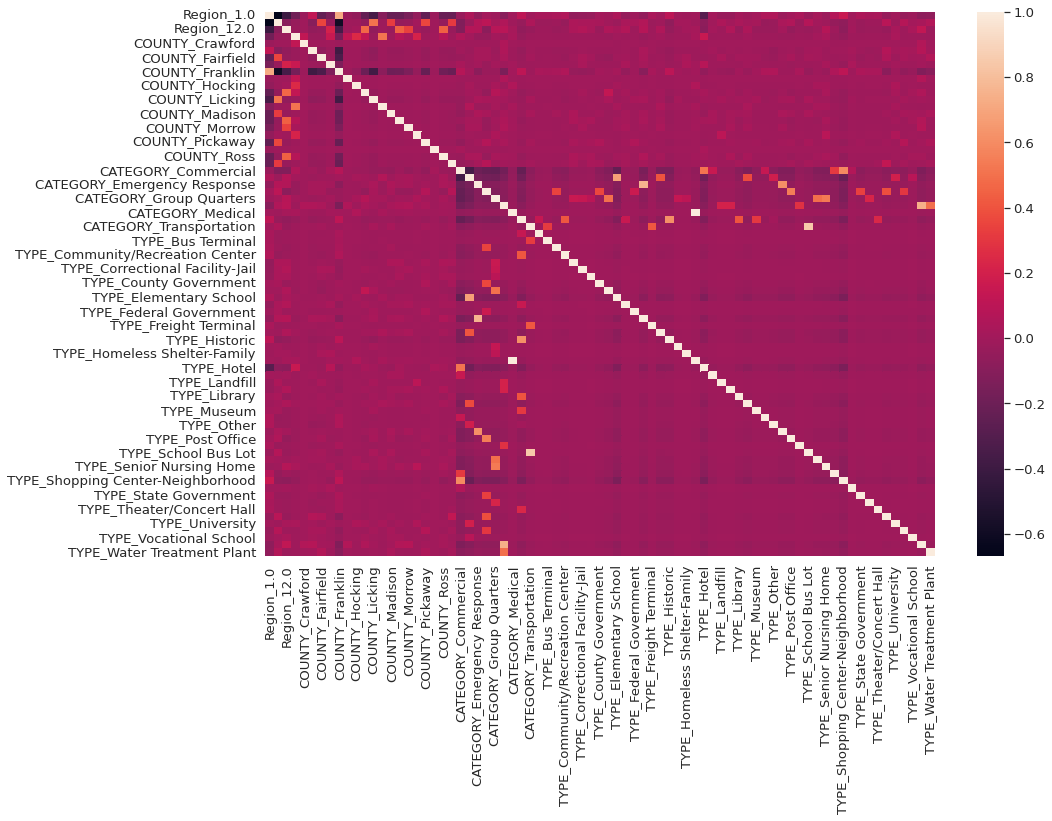

In [111]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr())

In [117]:
data.head()

ADDRESS  ... NAME_knox County Sheriff's Office
0     10220 US 42  ...                                 0
1  2305 WILSON RD  ...                                 0
2  11431 ALLEN RD  ...                                 0
3    8400 LYRA DR  ...                                 0
4   256 JAMES WAY  ...                                 0

[5 rows x 3680 columns]

In [113]:
# sns.pairplot(data)

In [ ]:
# sns.displot(x = 'Type', data = data)

In [118]:
## shuffle
from sklearn.utils import shuffle
clean = shuffle(data)

## reset indexes
clean.reset_index(inplace=True, drop=True)

In [119]:
from sklearn.model_selection import train_test_split

In [ ]:
X = clean.drop('Target', axis = 1)
y = clean['Target']

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size = 0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns, index = X_train.index)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns, index = X_test.index)

In [ ]:
X = X.transpose()
X_train, y_train = sm.fit_resample(X_train, y_train)
y.value_counts(normalize = True)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


models = {
    'LR': LinearRegression(),
    'SVM': SVR(),
    'KNN': KNeighborsRegressor(),
    'DT': DecisionTreeRegressor(),
    'RF': RandomForestRegressor(),
    # 'XGB': XGBRegressor()
}


for name, model in models.items():
    print(f"Model: {name}")
    print("-"*20)
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    print(f"Train MAE: {mean_absolute_error(y_train, y_pred_train)}")
    print(f"Test MAE: {mean_absolute_error(y_test, y_pred_test)}")
    print(f"Train RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train))}")
    print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test))}")
    print(f"Train R2: {r2_score(y_train, y_pred_train)}")
    print(f"Test R2: {r2_score(y_test, y_pred_test)}")
    print("\n")

In [120]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pandoc is already the newest version (1.19.2.4~dfsg-1build4).
pandoc set to manually installed.
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0 cuda-nsight-10-0
  cuda-nsight-10-1 cuda-nsight-11-0 cuda-nsight-11-1 cuda-nsight-compute-10-0
  cuda-nsight-compute-10-1 c

In [125]:
cp --help

Usage: cp [OPTION]... [-T] SOURCE DEST
  or:  cp [OPTION]... SOURCE... DIRECTORY
  or:  cp [OPTION]... -t DIRECTORY SOURCE...
Copy SOURCE to DEST, or multiple SOURCE(s) to DIRECTORY.

Mandatory arguments to long options are mandatory for short options too.
  -a, --archive                same as -dR --preserve=all
      --attributes-only        don't copy the file data, just the attributes
      --backup[=CONTROL]       make a backup of each existing destination file
  -b                           like --backup but does not accept an argument
      --copy-contents          copy contents of special files when recursive
  -d                           same as --no-dereference --preserve=links
  -f, --force                  if an existing destination file cannot be
                                 opened, remove it and try again (this option
                                 is ignored when the -n option is also used)
  -i, --interactive            prompt before overwrite (overrides a previo

In [130]:
!cp /drive/MyDrive/Colab-Notebooks/ohio_analysis.ipynb ./

cp: cannot stat '/drive/MyDrive/Colab-Notebooks/ohio_analysis.ipynb': No such file or directory


In [131]:
!jupyter nbconvert --to PDF "ohio_analysis.ipynb"

[NbConvertApp] WARNING | pattern u'ohio_analysis.ipynb' matched no files
This application is used to convert notebook files (*.ipynb) to various other
formats.


Options
-------

Arguments that take values are actually convenience aliases to full
Configurables, whose aliases are listed on the help line. For more information
on full configurables, see '--help-all'.

--execute
    Execute the notebook prior to export.
--allow-errors
    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevant if '--execute' was specified, too.
--no-input
    Exclude input cells and output prompts from converted document. 
    This mode is ideal for generating code-free reports.
--stdout
    Write notebook output to stdout instead of files.
--stdin
    read a single notebook file from stdin. Write the resulting notebook with default basename 'notebook.*'
--inplace
    Run